# Implementing Principle Component Analysis (PCA) from Scratch

## The main steps of the PCA algorithm are as follows:

1. Compute the mean of the input data along each feature dimension.

2. Subtract the mean from the input data to center it around zero.

3. Compute the covariance matrix of the centered input data.

4. Compute the eigenvectors and eigenvalues of the covariance matrix.

5. Keep only the first n_components eigenvectors as the principal components.

6. Compute the explained variance ratio for each principal component.

7. Transform the input data by projecting it onto the principal components.

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd

In [3]:
class PCA:
    """
    Principal Component Analysis (PCA) class for dimensionality reduction.
    """

    def __init__(self, n_components):
        """
        Constructor method that initializes the PCA object with the number of components to retain.
        """
        self.n_components = n_components
        self.mean = None

    
    def fit(self, X):
        """
        Fits the PCA model to the input data and computes the principal components.
        """

        # Compute the mean of the input data along each feature dimension.
        # Here we are centering the data by computing the per-feature mean and subtracting it
        self.mean = np.mean(X, axis = 0)
        
        # Subtract the mean from the input data to center it around zero.
        X = X - self.mean

        # Compute the covariance matrix of the centered input data.
        covariance = np.cov(X.T) # or covariance = np.cov(X, rowvar = False)

        # Compute the eigenvectors and eigenvalues of the covariance matrix.
        eigenvalues, eigenvectors = np.linalg.eigh(covariance) # Return the eigenvalues and eigenvectors of a complex or a real symmetric matrix.

        # Reverse the order of the eigenvalues and eigenvectors (largest variance first).
        eigenvalues = eigenvalues[::-1]
        eigenvectors = eigenvectors[:,::-1]

        # Keep only the first n_components eigenvectors as the principal components.
        self.components = eigenvectors[:, :self.n_components]

        # Compute the explained variance ratio for each principal component.
        # Compute the total variance of the input data
        total_variance = eigenvalues.sum()

        # Compute the variance explained by each principal component
        self.explained_variances = eigenvalues[:self.n_components]
        
        # Compute the explained variance ratio for each principal component
        self.explained_variance_ratio_ = self.explained_variances / total_variance


    def transform(self, X):
        """
        Transforms the input data by projecting it onto the principal components.
        """
        if self.mean is None or self.components is None:
            raise RuntimeError("PCA is not fitted yet. Call fit(X) first.")

        # Center the input data around zero using the mean computed during the fit step.
        X = X - self.mean

        # Project the centered input data onto the principal components.
        transformed_data = np.dot(X, self.components)

        return transformed_data

    
    def fit_transform(self, X):
        """
        Fits the PCA model to the input data and computes the principal components then
        transforms the input data by projecting it onto the principal components.
        """

        self.fit(X)
        return self.transform(X)


### Checking this on a sample dataset

In [14]:
# Importing required libraries

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [15]:
# Sample dataset

data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}

df = pd.DataFrame(data)
print(df)

   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


In [16]:
X = df.drop('Gender', axis = 1)
Y = df['Gender']

In [17]:
# Standardizing the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [18]:
# Applying PCA

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X_scaled)

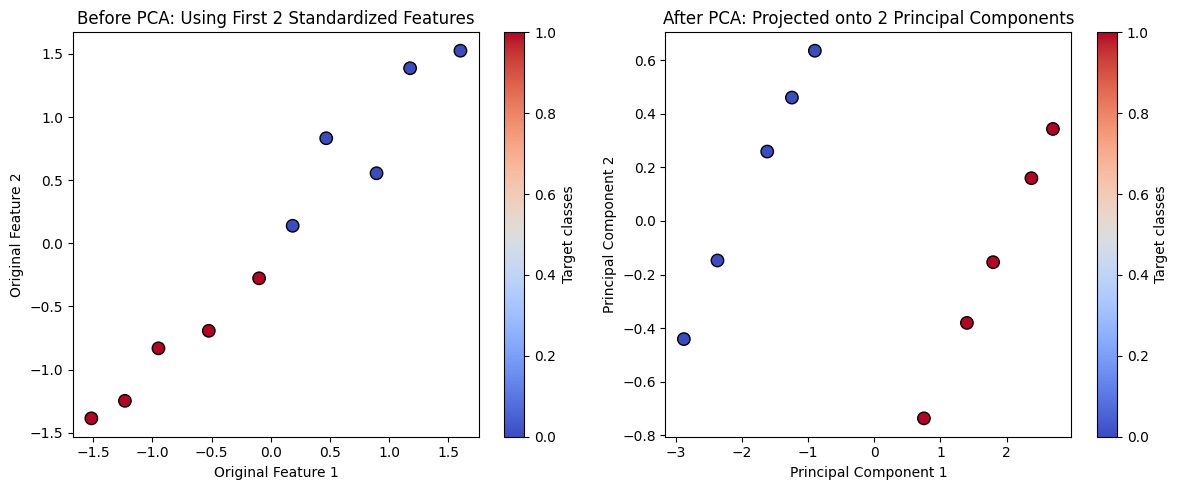

In [19]:
Y_numeric = pd.factorize(Y)[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = Y_numeric, cmap = 'coolwarm', edgecolor = 'k', s = 80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = Y_numeric, cmap = 'coolwarm', edgecolor='k', s = 80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()